In [1]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'ff_thesis_linear'
# load dataframe 
response_data = pd.read_csv(f'/Users/simoneebert/Documents/Simulations/motion_anticipation_network/{net}/responses_RG_tauNA.csv')


# load dataframe 
dfA = pd.read_csv(f'/Users/simoneebert/Documents/Simulations/motion_anticipation_network/{net}/anticipation_data_tauNA.csv')


print(dfA.columns)

# calculate anticipation with respect to V_drive
dfA['ant_RG_drive_time']  =  dfA['peak_drive'] - dfA['peak_RG'] 
dfA['ant_RG_drive_space'] = dfA['ant_RG_drive_time']* dfA['speed']

# calculate anticipation with respect to 
dfA['ant_RG_bar_time']  = dfA['tp_rf_GC_mid'] - dfA['peak_RG'] 
dfA['ant_RG_bar_space'] = dfA['ant_RG_bar_time']* dfA['speed']

dfA['taunAr']= dfA['taunA'].round(3)
dfA= dfA.query('taunAr >= 1')
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = dfA['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]





Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'krecA', 'krelA', 'kratio',
       'betaA', 'neqA', 'taunA', 'nminA', 'onset_RG_pooling',
       'onset_RB_pooling'],
      dtype='object')


In [3]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'
net = 'ff_thesis_linear'
# load dataframe 
response_data = pd.read_csv(f'/Users/simoneebert/Documents/Simulations/motion_anticipation_network/{net}/responses_RG_tauNB.csv')


# load dataframe 
dfB = pd.read_csv(f'/Users/simoneebert/Documents/Simulations/motion_anticipation_network/{net}/anticipation_data_tauNB.csv')


print(dfB.columns)

# calculate anticipation with respect to V_drive
dfB['ant_RG_drive_time']  =  dfB['peak_drive'] - dfB['peak_RG'] 
dfB['ant_RG_drive_space'] = dfB['ant_RG_drive_time']* dfB['speed']

# calculate anticipation with respect to 
dfB['ant_RG_bar_time']  = dfB['tp_rf_GC_mid'] - dfB['peak_RG'] 
dfB['ant_RG_bar_space'] = dfB['ant_RG_bar_time']* dfB['speed']

dfB['taunBr']= dfB['taunB'].round(3)
dfB= dfB.query('taunBr > 0.5')

# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])







Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'krecB', 'krelB', 'kratio',
       'betaB', 'neqB', 'taunB', 'nminB', 'onset_RG_pooling',
       'onset_RB_pooling'],
      dtype='object')


# Figure parameter

In [4]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3
figsize = (16,16)

save = True
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300
panellabel_position = [-0.1, .80]


In [5]:
cNorm = colors.Normalize(vmin =dfA['taunAr'].min(), vmax = dfA['taunAr'].max())
cmap = plt.get_cmap('viridis', len(dfA['taunAr'].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

<Axes: xlabel='betaA'>

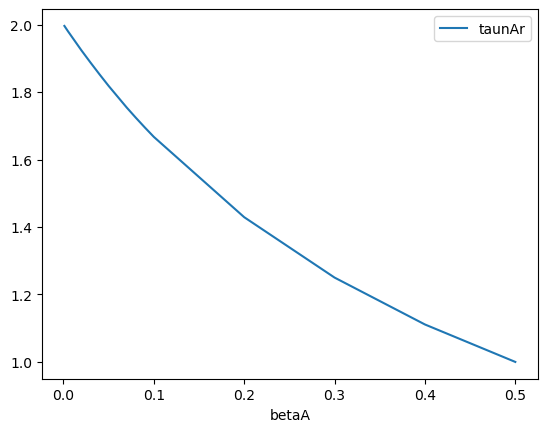

In [6]:
dfA.plot(x = 'betaA', y = 'taunAr')

<>:82: SyntaxWarning: invalid escape sequence '\d'
<>:82: SyntaxWarning: invalid escape sequence '\d'
/var/folders/mz/v_y_dj556cs59qdf5qbn5tbc0000gn/T/ipykernel_50377/1247110373.py:82: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta A$ [mm]', fontsize = fontsize_legend)
/var/folders/mz/v_y_dj556cs59qdf5qbn5tbc0000gn/T/ipykernel_50377/1247110373.py:75: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sg = subg.get_group(w2)
/var/folders/mz/v_y_dj556cs59qdf5qbn5tbc0000gn/T/ipykernel_50377/1247110373.py:98: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sg = subg.get_group(w2)


Text(0.5, 0, 'speed [mm/s]')

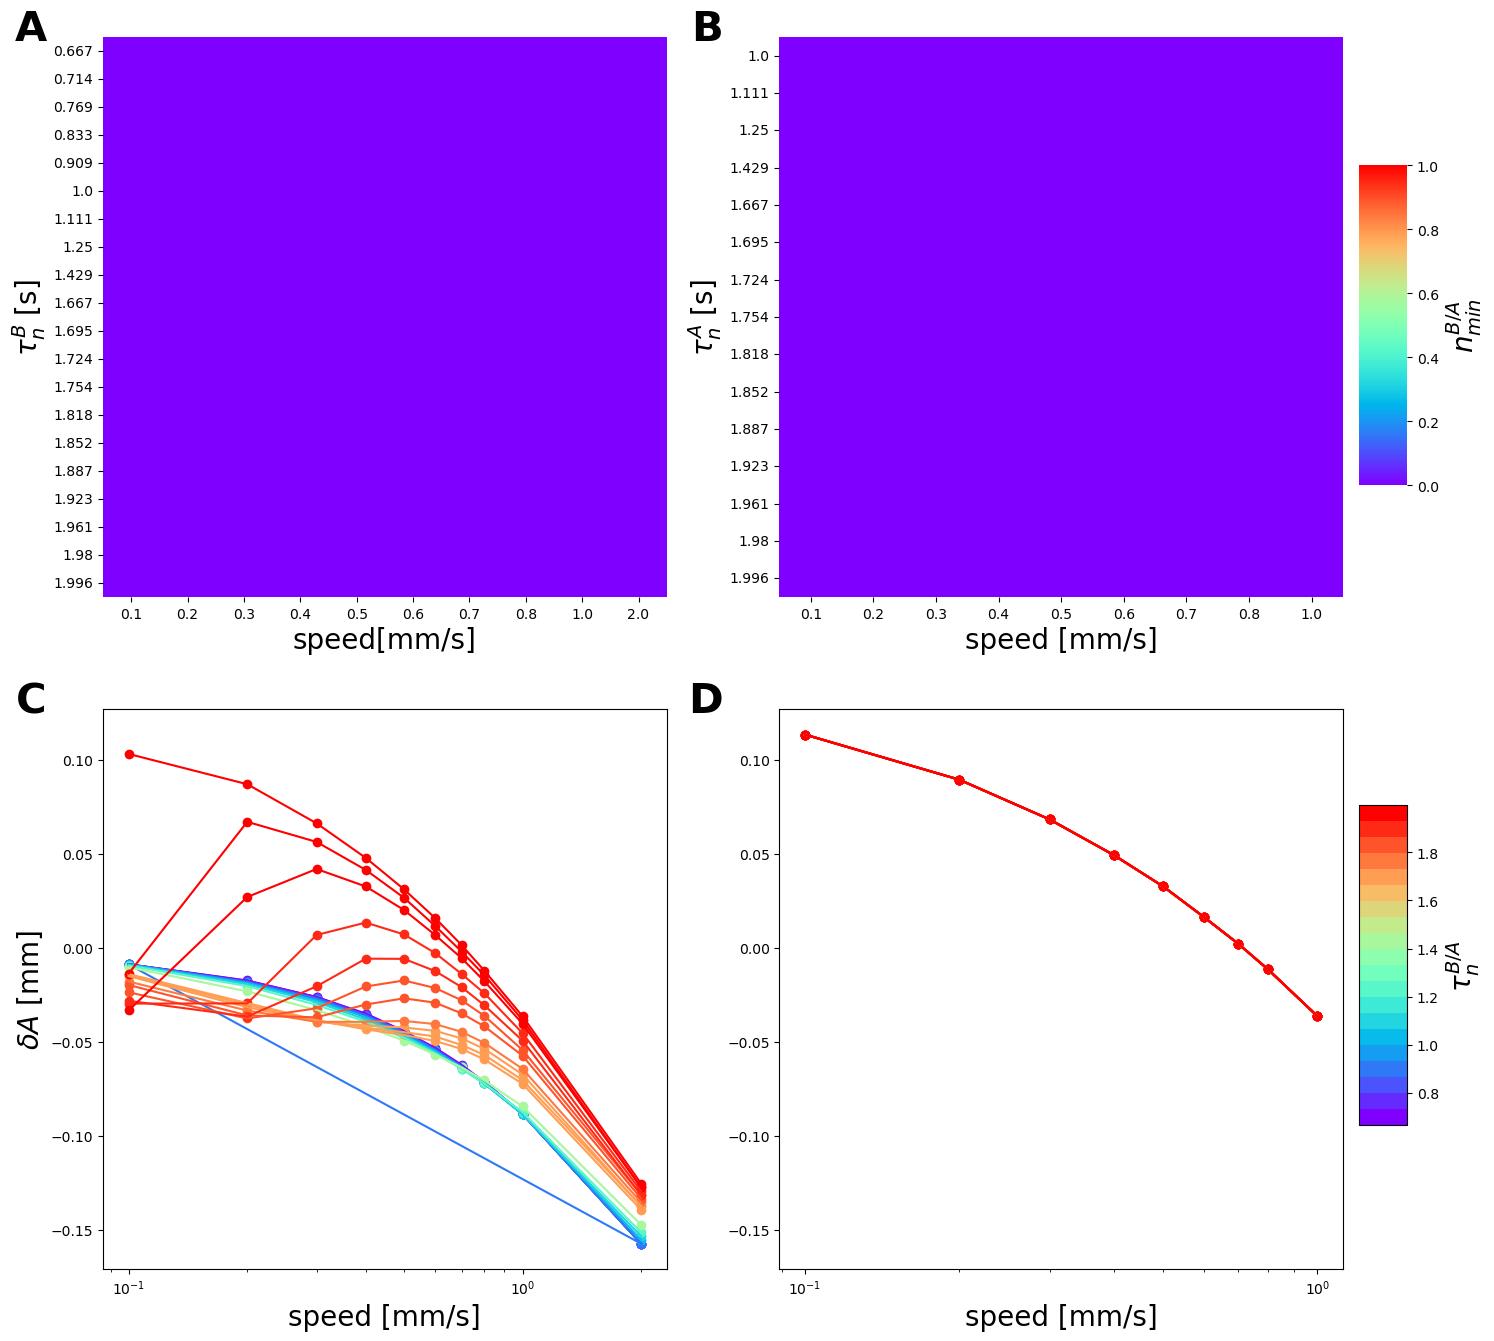

In [7]:
var = 'ant_diff_RG_bar_to_fixed'


#initialize figure
nrows = 2
ncols = 2

fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
#fig.tight_layout()


#TODO adjustment
# fig.subplots_adjust(top=0.892,
#                         bottom=0.102,
#                         left=0.068,
#                         right=0.944,
#                         hspace=1.0,anticipation
#                         wspace=0.456)


#TODO remove axis

#TODO fontsizes

cbar_ax = fig.add_axes([.91, .6, .03, .2])
cbar_ax2 = fig.add_axes([.91, .2, .03, .2])


cbar_ax.set_ylabel(r'$n_{min}^{B/A}$', fontsize = fontsize_legend)
cbar_ax2.set_ylabel(r'$\tau_{n}^{B/A}$', fontsize = fontsize_legend)

ax = fig.add_subplot(gs[0,0])
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
# plot heatmap for beta
g_heatmap = dfB.pivot_table(index = 'taunBr',columns = 'speed',values = 'nminB', aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'rainbow',  vmin=0, vmax=1, cbar = None)

ax.set_ylabel(r'$\tau_{n}^{B}$ [s]', fontsize = fontsize_legend)
ax.set_xlabel('speed[mm/s]', fontsize = fontsize_legend)



ax = fig.add_subplot(gs[0,1])
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
# plot heatmap for beta
g_heatmap = dfA.pivot_table(index = 'taunAr',columns = 'speed',values = 'nminA', aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'rainbow',  vmin=0, vmax=1, cbar_ax = cbar_ax, cbar_kws={'label': r'$n_{min}^{B/A}$'})
ax.set_ylabel(r'$\tau_{n}^{A}$ [s]', fontsize = fontsize_legend)
ax.set_xlabel('speed [mm/s]', fontsize = fontsize_legend)


var= 'ant_RG_bar_space'

ax = fig.add_subplot(gs[1,0])
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
cNorm = colors.Normalize(vmin =dfB['taunBr'].min(), vmax = dfB['taunBr'].max())
cmap = plt.get_cmap('rainbow', len(dfB['taunBr'].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
fig.colorbar(scalarMap,
             cax=cbar_ax2, orientation='vertical', label=r'$\tau_{n}^{B/A}$')


subg = dfB.groupby(['taunBr'])
ax.set_xscale('log')
for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)

    plt.plot(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(w2))
    plt.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(w2))


ax.set_xlabel('speed [mm/s]', fontsize = fontsize_legend)
ax.set_ylabel('$\delta A$ [mm]', fontsize = fontsize_legend)


ax = fig.add_subplot(gs[1,1], sharey = ax)
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "D", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
# cNorm = colors.Normalize(vmin =dfA['taunAr'].min(), vmax = dfA['taunAr'].max())
# cmap = plt.get_cmap('viridis', len(dfA['taunAr'].unique()))

# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)



subg = dfA.groupby(['taunAr'])
ax.set_xscale('log')
for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)

    plt.plot(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(w2))
    plt.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(w2))

ax.set_xlabel('speed [mm/s]', fontsize = fontsize_legend)
#ax.set_ylabel('anticipation [mm]')
